In [1]:
# from opfunu.cec_based.cec2017 import F52017
from mealpy import FloatVar, GA, Tuner     # We will use this Tuner utility
# from mealpy.swarm_based import GA
import numpy as np


In [2]:

def rastrigin(x):
    """
    Rastrigin function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Rastrigin function at the given point.
    """
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

n=5

lb = [-5.12] * n
ub = [5.12] * n

p1 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": rastrigin,
    "minmax": "min",
    "name": "Rastrigin function"
}


In [3]:
def ackley(x):
    """
    Ackley function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Ackley function at the given point.
    """
    a = 20
    b = 0.2
    c = 2 * np.pi

    term1 = -a * np.exp(-b * np.sqrt(np.sum(x**2) / len(x)))
    term2 = -np.exp(np.sum(np.cos(c * x) / len(x)))

    return term1 + term2 + a + np.exp(1)

n=5

lb = [-32.768] * n
ub = [32.768] * n

p2 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": ackley,
    "minmax": "min",
    "name": "Ackley function"
}

In [4]:
def rosenbrock(x):
    """
    Rosenbrock function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Rosenbrock function at the given point.
    """
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

n=5

lb = [-5] * n
ub = [10] * n

p3 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": rosenbrock,
    "minmax": "min",
    "name": "Rosenbrock function"
}

In [5]:
paras_ga_grid = {
    "epoch": [100,300,500],
    "pop_size": [100,300,500],
    "pc": [0.95,0.9,0.8,0.7],
    "pm": [0.01,0.05,0.1,0.2],
}

term = {
    "max_epoch": 5000,
    "max_time": 30,
    "max_fe": 10000
}

# Start here

In [6]:
prob = p3

# p1 ... "Rastrigin function" - eggholder
# p2 ... "Ackley function" - mountain
# p3 ... "Rosenbrock function" - wave

In [7]:
### Define model and parameter grid of the model (just like ParameterGrid / GridSearchCV)
model = GA.BaseGA()
tuner = Tuner(model, paras_ga_grid)

In [8]:
## Try to run this optimizer on this problem 5 times (n_trials = 5). 
## Get the best model by mean value of all trials
tuner.execute(problem=prob, n_trials=5, termination=term)

## Better to save the tunning results to CSV for later usage
tuner.export_results()

## Also better to draw the figures that are available.
tuner.export_figures()


print("------------------------------------")
print("------------------------------------")
## Print out the best pameters
print(f"Best parameter: {tuner.best_params}")

## Print out the best score of the best parameter
print(f"Best score: {tuner.best_score}")

## Print out the algorithm with the best parameter
print(f"Best Optimizer: {tuner.best_algorithm}")

2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 297.8273817475198, Global best: 297.8273817475198, Runtime: 0.01590 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 985.1606136786781, Global best: 985.1606136786781, Runtime: 0.01643 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 297.8273817475198
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 985.1606136786781
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 2362.033192785561
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 923.3881578404159
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 1213.9547596617551
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 4342.295959680096
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 1544.3214941338886
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm':

2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 221.49264997360575, Global best: 221.49264997360575, Runtime: 0.01737 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 281.9702804348517, Global best: 281.9702804348517, Runtime: 0.01609 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 785.1458276497542
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 221.49264997360575
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 281.9702804348517
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 1299.3870392558083
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 917.1841416768461
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 82.73225706951081
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 115.59052391267213
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2

2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 2898.63218699506, Global best: 2898.63218699506, Runtime: 0.01666 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1174.211513700528, Global best: 1174.211513700528, Runtime: 0.01563 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 2898.63218699506
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 1174.211513700528
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 2389.8633598067872
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 355.1502855428325
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 944.5406380448724
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 3255.6594081456374
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 4550.660162860317
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, t

2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 2258.9734547625967, Global best: 2258.9734547625967, Runtime: 0.01587 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 234.70613988462895, Global best: 234.70613988462895, Runtime: 0.01535 seconds
2024/02/22 05:16:23 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 2258.9734547625967
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 234.70613988462895
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 819.5664014449076
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 191.12789785196753
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 264.7869460851537
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 981.5807253316784
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 661.1628734588859
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, tri

2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1784.5118184669273, Global best: 1738.9784005767647, Runtime: 0.01400 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 2111.2603369501694, Global best: 2111.2603369501694, Runtime: 0.01578 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 418.4743350082688
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 1738.9784005767647
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 2111.2603369501694
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 1235.400869653646
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 938.466838256932
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 1152.7111612195208
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 1479.2243656365217
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial

2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1647.743167696579, Global best: 1647.743167696579, Runtime: 0.01534 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1719.6219691540484, Global best: 1719.6219691540484, Runtime: 0.01403 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 535.420226085891
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 1647.743167696579
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 1719.6219691540484
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 613.8099558124579
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 3924.136407606661
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 2718.677508719225
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 1274.6152268221197
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, t

2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1103.4272603983236, Global best: 1103.4272603983236, Runtime: 0.01779 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 590.166591625458, Global best: 590.166591625458, Runtime: 0.01498 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 1103.4272603983236
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 590.166591625458
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 876.1615863025992
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 270.41811525908656
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 1359.735611931882
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 982.0470413268338
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 1279.8699277629485
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 4

2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 762.5053266528564, Global best: 762.5053266528564, Runtime: 0.01341 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1258.4422872543569, Global best: 1258.4422872543569, Runtime: 0.01446 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 893.485786106177
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 762.5053266528564
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 1258.4422872543569
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 3686.3834779339654
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 1377.6933961740292
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 822.3800218335812
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 988.2196411357165
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, 

2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 983.1418150506615, Global best: 983.1418150506615, Runtime: 0.01710 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 550.0417659094439, Global best: 550.0417659094439, Runtime: 0.01409 seconds
2024/02/22 05:16:24 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:24 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 710.789709712648
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 983.1418150506615
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 550.0417659094439
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 1491.8687940477876
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 1580.8381087295265
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 8337.994074963925
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 2295.872860776221
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 

2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1760.925807706447, Global best: 1760.925807706447, Runtime: 0.01538 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1579.238811078454, Global best: 1579.238811078454, Runtime: 0.01356 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evol

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 2501.4994903456136
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 1760.925807706447
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 1579.238811078454
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 656.2035909521031
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 109.80744438629895


2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 420.0903655060657, Global best: 420.0903655060657, Runtime: 0.05746 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 279.21084126557605, Global best: 279.21084126557605, Runtime: 0.05325 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 420.0903655060657
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 279.21084126557605
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 213.41270793783946


2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 493.82168755251604, Global best: 493.82168755251604, Runtime: 0.05083 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 66.98292402390932, Global best: 66.98292402390932, Runtime: 0.05214 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 436.081632808891
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 493.82168755251604
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 66.98292402390932


2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 610.2970086509107, Global best: 610.2970086509107, Runtime: 0.05501 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 487.62836988855696, Global best: 487.62836988855696, Runtime: 0.05218 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:25 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 610.2970086509107
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 487.62836988855696
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 1062.526587208612


2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 309.33925994087076, Global best: 309.33925994087076, Runtime: 0.05341 seconds
2024/02/22 05:16:25 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 73.28450470778223, Global best: 73.28450470778223, Runtime: 0.05346 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 309.33925994087076
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 73.28450470778223
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 158.95311738124508


2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 160.83867615794372, Global best: 160.83867615794372, Runtime: 0.05955 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 220.256636961273, Global best: 220.256636961273, Runtime: 0.05370 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 160.83867615794372
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 220.256636961273
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 214.85453019048504


2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1950.749392542014, Global best: 1950.749392542014, Runtime: 0.05276 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 467.3910322955489, Global best: 467.3910322955489, Runtime: 0.05148 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 1950.749392542014
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 467.3910322955489
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 414.48138132850147


2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 198.19749714659395, Global best: 198.19749714659395, Runtime: 0.05103 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 252.03668139643386, Global best: 252.03668139643386, Runtime: 0.05036 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 372.2085514613127
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 198.19749714659395
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 252.03668139643386


2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 43.540098464544265, Global best: 43.540098464544265, Runtime: 0.05020 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 745.7039594113542, Global best: 745.7039594113542, Runtime: 0.04976 seconds
2024/02/22 05:16:26 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:26 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 505.74740718330446
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 43.540098464544265
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 745.7039594113542


2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 674.0843934908789, Global best: 674.0843934908789, Runtime: 0.05473 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 430.267554242049, Global best: 430.267554242049, Runtime: 0.05450 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 674.0843934908789
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 430.267554242049
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 113.02359285045767


2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 657.3637679353706, Global best: 657.3637679353706, Runtime: 0.05122 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 733.1221620890815, Global best: 733.1221620890815, Runtime: 0.05224 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 657.3637679353706
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 733.1221620890815
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 95.83746391929611


2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 361.84409168505084, Global best: 361.84409168505084, Runtime: 0.05172 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 681.0115124785386, Global best: 681.0115124785386, Runtime: 0.05176 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 361.84409168505084
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 681.0115124785386
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 459.0211120522292


2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 347.09686366543076, Global best: 347.09686366543076, Runtime: 0.05490 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 535.3311013770873, Global best: 535.3311013770873, Runtime: 0.05155 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 347.09686366543076
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 535.3311013770873
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 188.55213938697545


2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 65.88866007422831, Global best: 65.88866007422831, Runtime: 0.05078 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 86.70707666845652, Global best: 86.70707666845652, Runtime: 0.04991 seconds
2024/02/22 05:16:27 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:27 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 226.04687601499705
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 65.88866007422831
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 86.70707666845652


2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 279.44581185980354, Global best: 279.44581185980354, Runtime: 0.05447 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 427.26076619271237, Global best: 427.26076619271237, Runtime: 0.05292 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 643.7892288027012
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 279.44581185980354
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 427.26076619271237


2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 292.9802106014152, Global best: 292.9802106014152, Runtime: 0.05268 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 639.8900414694839, Global best: 639.8900414694839, Runtime: 0.05060 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 292.9802106014152
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 639.8900414694839
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 170.94604117471172


2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 456.9196416655493, Global best: 456.9196416655493, Runtime: 0.05424 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 155.6187014910295, Global best: 155.6187014910295, Runtime: 0.05178 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 456.9196416655493
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 155.6187014910295
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 128.7415764340671


2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 261.94635450323676, Global best: 261.94635450323676, Runtime: 0.05256 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1622.6621285284568, Global best: 1622.6621285284568, Runtime: 0.04943 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 261.94635450323676
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 1622.6621285284568
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 283.0097912646372


2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1075.020939553667, Global best: 1075.020939553667, Runtime: 0.05136 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 777.8438357091852, Global best: 777.8438357091852, Runtime: 0.04978 seconds
2024/02/22 05:16:28 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 1075.020939553667
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 777.8438357091852
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 421.22444449271376


2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 557.069801316256, Global best: 557.069801316256, Runtime: 0.06215 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 654.5211477157172, Global best: 654.5211477157172, Runtime: 0.05361 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 167.99804616477712
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 557.069801316256
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 654.5211477157172


2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 610.7056238947159, Global best: 610.7056238947159, Runtime: 0.05850 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 323.3257959566152, Global best: 323.3257959566152, Runtime: 0.05368 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 610.7056238947159
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 5, best fitness: 323.3257959566152
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 99.91174446997896


2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 173.5400042061169, Global best: 173.5400042061169, Runtime: 0.05197 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 405.679409730308, Global best: 405.679409730308, Runtime: 0.04997 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolut

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 336.67424575504435
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 173.5400042061169
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 405.679409730308


2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 475.40861820081074, Global best: 475.40861820081074, Runtime: 0.05616 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 460.96685185137585, Global best: 460.96685185137585, Runtime: 0.05250 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:29 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 475.40861820081074
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 460.96685185137585
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 465.78490257656017


2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 480.67575072927207, Global best: 480.67575072927207, Runtime: 0.05321 seconds
2024/02/22 05:16:29 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 250.91143435851677, Global best: 250.91143435851677, Runtime: 0.05116 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 3, best fitness: 480.67575072927207
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 250.91143435851677
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 315.8346971240458


2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 421.61365359238533, Global best: 421.61365359238533, Runtime: 0.07044 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1174.1457174389022, Global best: 1174.1457174389022, Runtime: 0.06100 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 421.61365359238533
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 1174.1457174389022
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 372.1216302098024


2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 27.14297477699402, Global best: 27.14297477699402, Runtime: 0.05458 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 51.82352223706461, Global best: 51.82352223706461, Runtime: 0.05709 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 27.14297477699402
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 51.82352223706461
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 505.84205432756175


2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 299.35110105467567, Global best: 299.35110105467567, Runtime: 0.05278 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 434.52043244689753, Global best: 434.52043244689753, Runtime: 0.05029 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 299.35110105467567
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 434.52043244689753
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 694.3207821873223


2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 149.96345154909244, Global best: 149.96345154909244, Runtime: 0.11065 seconds
2024/02/22 05:16:30 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 1149.7876825460608
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 149.96345154909244


2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 716.5305103525583, Global best: 716.5305103525583, Runtime: 0.11361 seconds
2024/02/22 05:16:31 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 950.7461456502585, Global best: 950.7461456502585, Runtime: 0.11834 seconds
2024/02/22 05:16:31 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 716.5305103525583
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 950.7461456502585


2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 81.07693622440101, Global best: 81.07693622440101, Runtime: 0.11178 seconds
2024/02/22 05:16:31 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 289.08124775626413, Global best: 289.08124775626413, Runtime: 0.15478 seconds
2024/02/22 05:16:31 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 81.07693622440101


2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 143.55160572155046, Global best: 143.55160572155046, Runtime: 0.10996 seconds
2024/02/22 05:16:31 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 289.08124775626413
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 143.55160572155046


2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 220.58181862455305, Global best: 220.58181862455305, Runtime: 0.13106 seconds
2024/02/22 05:16:31 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 172.78624247829222, Global best: 172.78624247829222, Runtime: 0.11849 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 220.58181862455305
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 172.78624247829222


2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 487.6258944903003, Global best: 487.6258944903003, Runtime: 0.12422 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 71.32681480777336, Global best: 71.32681480777336, Runtime: 0.10972 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 487.6258944903003
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 71.32681480777336


2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 229.24699643154864, Global best: 229.24699643154864, Runtime: 0.11064 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 281.4057062658594, Global best: 281.4057062658594, Runtime: 0.10915 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 229.24699643154864
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 281.4057062658594


2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 35.80622867431384, Global best: 35.80622867431384, Runtime: 0.11304 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 611.0854896059958, Global best: 611.0854896059958, Runtime: 0.11662 seconds
2024/02/22 05:16:32 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 35.80622867431384
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 611.0854896059958


2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 78.73760055904657, Global best: 78.73760055904657, Runtime: 0.11247 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 200.57785329943783, Global best: 200.57785329943783, Runtime: 0.11117 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 78.73760055904657
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 200.57785329943783


2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 634.9792475021238, Global best: 634.9792475021238, Runtime: 0.11318 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 286.36875170625814, Global best: 286.36875170625814, Runtime: 0.11040 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 634.9792475021238
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 286.36875170625814


2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 243.1966593138274, Global best: 243.1966593138274, Runtime: 0.11309 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 265.3511223962387, Global best: 265.3511223962387, Runtime: 0.11223 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 243.1966593138274
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 265.3511223962387


2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 438.26676724512015, Global best: 438.26676724512015, Runtime: 0.11145 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 187.45994209376138, Global best: 187.45994209376138, Runtime: 0.11036 seconds
2024/02/22 05:16:33 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 438.26676724512015
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 187.45994209376138


2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 157.77727117212856, Global best: 157.77727117212856, Runtime: 0.11368 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 61.5754547512303, Global best: 61.5754547512303, Runtime: 0.11252 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 157.77727117212856
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 61.5754547512303


2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 178.7638693267195, Global best: 178.7638693267195, Runtime: 0.11190 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 397.95122429638593, Global best: 397.95122429638593, Runtime: 0.10886 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 178.7638693267195
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 397.95122429638593


2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 84.64921264775431, Global best: 84.64921264775431, Runtime: 0.11288 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 57.893801065425315, Global best: 57.893801065425315, Runtime: 0.11135 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 84.64921264775431
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 57.893801065425315


2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 177.26647010241427, Global best: 177.26647010241427, Runtime: 0.11354 seconds
2024/02/22 05:16:34 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 190.9301371022757, Global best: 190.9301371022757, Runtime: 0.11125 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 177.26647010241427
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 190.9301371022757


2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 120.273404411143, Global best: 120.273404411143, Runtime: 0.13797 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 123.5358916938569, Global best: 123.5358916938569, Runtime: 0.11929 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 120.273404411143
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 123.5358916938569


2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 384.90741381894907, Global best: 384.90741381894907, Runtime: 0.11145 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 925.2981663851405, Global best: 925.2981663851405, Runtime: 0.10644 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 384.90741381894907
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 925.2981663851405


2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 185.47203800819224, Global best: 185.47203800819224, Runtime: 0.11294 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 255.29067661993832, Global best: 255.29067661993832, Runtime: 0.10735 seconds
2024/02/22 05:16:35 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:35 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 185.47203800819224
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 255.29067661993832


2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 144.84745464538298, Global best: 144.84745464538298, Runtime: 0.11120 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 47.002976268319856, Global best: 47.002976268319856, Runtime: 0.10961 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 144.84745464538298
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 47.002976268319856


2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 359.53268806369533, Global best: 359.53268806369533, Runtime: 0.11352 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 165.07951529606777, Global best: 165.07951529606777, Runtime: 0.10838 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 359.53268806369533
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 165.07951529606777


2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 65.52296303516539, Global best: 65.52296303516539, Runtime: 0.10994 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 274.5532911618097, Global best: 274.5532911618097, Runtime: 0.10847 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 65.52296303516539
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 274.5532911618097


2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 334.5706514207711, Global best: 334.5706514207711, Runtime: 0.10907 seconds
2024/02/22 05:16:36 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 133.97043427594508, Global best: 133.97043427594508, Runtime: 0.10713 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 334.5706514207711
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 133.97043427594508


2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 113.44880046337092, Global best: 113.44880046337092, Runtime: 0.11477 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 188.22256365115265, Global best: 188.22256365115265, Runtime: 0.10983 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 113.44880046337092
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 188.22256365115265


2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 571.9570657679552, Global best: 571.9570657679552, Runtime: 0.11762 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 199.84452861069317, Global best: 199.84452861069317, Runtime: 0.11159 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 571.9570657679552
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 199.84452861069317


2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 239.45445418245697, Global best: 239.45445418245697, Runtime: 0.10959 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 384.15660423228286, Global best: 384.15660423228286, Runtime: 0.10405 seconds
2024/02/22 05:16:37 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:37 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 239.45445418245697
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 384.15660423228286


2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 143.70120692158594, Global best: 143.70120692158594, Runtime: 0.11350 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 111.17766653736768, Global best: 111.17766653736768, Runtime: 0.10928 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 143.70120692158594
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 111.17766653736768


2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 275.1216754814153, Global best: 275.1216754814153, Runtime: 0.10372 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 339.8964689478399, Global best: 339.8964689478399, Runtime: 0.10125 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 275.1216754814153
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 339.8964689478399


2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 372.47895416289003, Global best: 372.47895416289003, Runtime: 0.10539 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 669.2666317988136, Global best: 669.2666317988136, Runtime: 0.10340 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 372.47895416289003
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 669.2666317988136


2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 232.61600771390783, Global best: 232.61600771390783, Runtime: 0.10477 seconds
2024/02/22 05:16:38 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 336.5984358671432, Global best: 336.5984358671432, Runtime: 0.10194 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 232.61600771390783
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 336.5984358671432


2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 131.88106735419169, Global best: 131.88106735419169, Runtime: 0.10240 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 215.61417921130078, Global best: 215.61417921130078, Runtime: 0.10628 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 131.88106735419169
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 5, best fitness: 215.61417921130078


2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 335.09886378144523, Global best: 335.09886378144523, Runtime: 0.10329 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 616.7156454467447, Global best: 616.7156454467447, Runtime: 0.13967 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 335.09886378144523
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 616.7156454467447


2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 75.54949641063754, Global best: 75.54949641063754, Runtime: 0.10268 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 134.2748543196934, Global best: 134.2748543196934, Runtime: 0.10247 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 75.54949641063754
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 134.2748543196934


2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 452.3065933632304, Global best: 452.3065933632304, Runtime: 0.10178 seconds
2024/02/22 05:16:39 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 518.369305206507, Global best: 518.369305206507, Runtime: 0.10198 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 452.3065933632304
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 518.369305206507


2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 193.13227301483977, Global best: 193.13227301483977, Runtime: 0.10298 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 61.59406742702823, Global best: 61.59406742702823, Runtime: 0.10146 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 193.13227301483977
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 3, best fitness: 61.59406742702823


2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 570.7977831895766, Global best: 570.7977831895766, Runtime: 0.10349 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 228.68303869129466, Global best: 228.68303869129466, Runtime: 0.10199 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 570.7977831895766
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 228.68303869129466


2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 62.27035398054301, Global best: 62.27035398054301, Runtime: 0.10076 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 264.2903237038479, Global best: 264.2903237038479, Runtime: 0.10283 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 62.27035398054301
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 264.2903237038479


2024/02/22 05:16:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 264.11443600550547, Global best: 264.11443600550547, Runtime: 0.10361 seconds
2024/02/22 05:16:40 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 264.6273051917258, Global best: 264.6273051917258, Runtime: 0.10168 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 264.11443600550547
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 264.6273051917258


2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 332.0999162662443, Global best: 332.0999162662443, Runtime: 0.10471 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 529.8912241961845, Global best: 529.8912241961845, Runtime: 0.10276 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 332.0999162662443
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 529.8912241961845


2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 234.6775200897701, Global best: 234.6775200897701, Runtime: 0.10230 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 89.8144147123831, Global best: 89.8144147123831, Runtime: 0.13810 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 234.6775200897701
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 89.8144147123831


2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 379.08842642514713, Global best: 379.08842642514713, Runtime: 0.10389 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 365.0954293895474, Global best: 365.0954293895474, Runtime: 0.10147 seconds
2024/02/22 05:16:41 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:41 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 379.08842642514713
Algorithm: BaseGA, with params: {'epoch': 100, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 365.0954293895474
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 2661.7676266337953
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 799.0002565461082


2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 5532.986198489574, Global best: 5532.986198489574, Runtime: 0.01679 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 66.98540929162479, Global best: 66.98540929162479, Runtime: 0.01419 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evol

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 1230.934487014522
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 5532.986198489574
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 66.98540929162479
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 1177.7715221837377
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 755.365584123955
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 2806.112198066862
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 724.2730143287376
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0

2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 587.0258018118394, Global best: 587.0258018118394, Runtime: 0.01675 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 434.6506718362645, Global best: 434.6506718362645, Runtime: 0.01403 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 587.0258018118394
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 434.6506718362645
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 231.17896337939823
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 2284.0750569985794
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 1963.3551096122924
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 1423.2497213986587
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 2386.2658464132455
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2

2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 949.2551139922159, Global best: 949.2551139922159, Runtime: 0.01527 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1224.7058605837583, Global best: 1224.7058605837583, Runtime: 0.01417 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 3434.1708475425307
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 949.2551139922159
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 1224.7058605837583
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 1327.5985401912935
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 900.7365081573273
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 1365.357153370444
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 1357.1264527745398
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}

2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 495.8132450819225, Global best: 495.8132450819225, Runtime: 0.01560 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1056.0615860283624, Global best: 1056.0615860283624, Runtime: 0.01697 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 495.8132450819225
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 1056.0615860283624
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 1675.54445443223
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 1528.2792096171163
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 1643.8029512620656
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 1129.8808334857933
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 4768.091479418997
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, tria

2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1329.610723800888, Global best: 1329.610723800888, Runtime: 0.01616 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1767.564749546261, Global best: 1767.564749546261, Runtime: 0.01423 seconds
2024/02/22 05:16:42 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:42 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 219.4288185325946
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 1329.610723800888
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 1767.564749546261
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 2845.7394898934485
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 470.65215548306617
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 593.529458397336
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 293.89088025893477
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial

2024/02/22 05:16:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 260.00946568225373, Global best: 260.00946568225373, Runtime: 0.01468 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 286.25658752303104, Global best: 286.25658752303104, Runtime: 0.01667 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 260.00946568225373
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 286.25658752303104
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 4919.147636723217
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 1954.6023582592863
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 772.0166379987254
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 176.05274924932382
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 864.9588234662308
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, 

2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 572.2276151461137, Global best: 572.2276151461137, Runtime: 0.01800 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 275.5374074193359, Global best: 275.5374074193359, Runtime: 0.01448 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 572.2276151461137
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 275.5374074193359
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 730.992821179666
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 692.6739498874794
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 514.7911143438461
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 2301.465156130818
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 1653.5006185702282
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 5, 

2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1955.0284404665845, Global best: 1955.0284404665845, Runtime: 0.01714 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 2934.879297962518, Global best: 2934.879297962518, Runtime: 0.01437 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 1955.0284404665845
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 2934.879297962518
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 416.8060962400044
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 297.9388374114463
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 3295.504761467444
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 656.0119776503766
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 482.32066869140425
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, 

2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 83.88532003972631, Global best: 83.88532003972631, Runtime: 0.01723 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 981.2392390154796, Global best: 981.2392390154796, Runtime: 0.01567 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 196.20355138558168
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 83.88532003972631
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 981.2392390154796
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 557.4560839979382
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 220.94479938318912
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 806.338315349238
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 708.3612969794589
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 

2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 329.82026230614593, Global best: 329.82026230614593, Runtime: 0.01407 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 3012.265364366889, Global best: 3012.265364366889, Runtime: 0.01405 seconds
2024/02/22 05:16:43 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 225.4482204072244
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 329.82026230614593
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 3012.265364366889
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 5143.756823905251
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 34.89107682212853


2024/02/22 05:16:43 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 324.8141908700468, Global best: 324.8141908700468, Runtime: 0.05768 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 126.86938279205435, Global best: 126.86938279205435, Runtime: 0.05343 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 263.6249772147643
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 324.8141908700468
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 126.86938279205435


2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 458.6333050543817, Global best: 458.6333050543817, Runtime: 0.05372 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 728.5732594750413, Global best: 728.5732594750413, Runtime: 0.05352 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 458.6333050543817
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 728.5732594750413
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 793.1090588157641


2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 227.396067157344, Global best: 227.396067157344, Runtime: 0.05506 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 415.2709062864441, Global best: 415.2709062864441, Runtime: 0.05428 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 227.396067157344
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 415.2709062864441
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 212.79976021759177


2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 540.31495966182, Global best: 540.31495966182, Runtime: 0.05527 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 828.403910145026, Global best: 828.403910145026, Runtime: 0.05309 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 540.31495966182
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 828.403910145026
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 178.00675159765618


2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 484.06898058459524, Global best: 484.06898058459524, Runtime: 0.06941 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 236.16347571845347, Global best: 236.16347571845347, Runtime: 0.05973 seconds
2024/02/22 05:16:44 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 484.06898058459524
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 236.16347571845347
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 498.7821140252245


2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 280.5346703277537, Global best: 280.5346703277537, Runtime: 0.05650 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 279.8281084052571, Global best: 279.8281084052571, Runtime: 0.05815 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 280.5346703277537
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 279.8281084052571
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 320.0563587310446


2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 182.9117086816478, Global best: 182.9117086816478, Runtime: 0.06021 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 921.6434473212664, Global best: 921.6434473212664, Runtime: 0.05286 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 182.9117086816478
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 921.6434473212664
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 522.2604716775461


2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 157.69840265129153, Global best: 157.69840265129153, Runtime: 0.05359 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 567.6054818445419, Global best: 567.6054818445419, Runtime: 0.05304 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 413.9803610078459
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 157.69840265129153
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 567.6054818445419


2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 209.508787460712, Global best: 209.508787460712, Runtime: 0.05417 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 152.4598081234483, Global best: 152.4598081234483, Runtime: 0.05435 seconds
2024/02/22 05:16:45 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:45 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 209.508787460712
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 152.4598081234483
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 474.9668562446234


2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 102.70323455937655, Global best: 102.70323455937655, Runtime: 0.05732 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 330.94937047412253, Global best: 330.94937047412253, Runtime: 0.05496 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 102.70323455937655
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 330.94937047412253
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 308.1076843836721


2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 358.56064861702146, Global best: 358.56064861702146, Runtime: 0.05516 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1124.6002521457463, Global best: 1124.6002521457463, Runtime: 0.05612 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 358.56064861702146
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 1124.6002521457463
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 301.49405116493995


2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 192.01711308138522, Global best: 192.01711308138522, Runtime: 0.05858 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 127.59197094902191, Global best: 127.59197094902191, Runtime: 0.05517 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 192.01711308138522
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 127.59197094902191
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 439.7422433250074


2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 139.1268711093103, Global best: 139.1268711093103, Runtime: 0.05917 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 493.3391283463685, Global best: 493.3391283463685, Runtime: 0.05682 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 139.1268711093103
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 493.3391283463685
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 1623.8359050495692


2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 749.4403671991672, Global best: 749.4403671991672, Runtime: 0.06149 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 374.89004699986083, Global best: 374.89004699986083, Runtime: 0.05441 seconds
2024/02/22 05:16:46 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 749.4403671991672
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 374.89004699986083
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 315.07508995549296


2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 229.89588557810114, Global best: 229.89588557810114, Runtime: 0.05587 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 178.74235628982558, Global best: 178.74235628982558, Runtime: 0.05739 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 229.89588557810114
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 178.74235628982558
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 335.5455993416951


2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 79.95579592384706, Global best: 79.95579592384706, Runtime: 0.05968 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 430.728700662945, Global best: 430.728700662945, Runtime: 0.05277 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 79.95579592384706
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 430.728700662945
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 267.6452666778655


2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 130.88027613235965, Global best: 130.88027613235965, Runtime: 0.05658 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 20.698118840084888, Global best: 20.698118840084888, Runtime: 0.05639 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 130.88027613235965
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 20.698118840084888
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 254.7200280724578


2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 528.101062837129, Global best: 528.101062837129, Runtime: 0.05519 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 165.8466393920225, Global best: 165.8466393920225, Runtime: 0.05314 seconds
2024/02/22 05:16:47 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:47 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 528.101062837129
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 165.8466393920225
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 332.1042406788261


2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 473.5534360355497, Global best: 473.5534360355497, Runtime: 0.05381 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 822.5337541847011, Global best: 822.5337541847011, Runtime: 0.05078 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 473.5534360355497
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 822.5337541847011
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 350.2759313305943


2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 647.8049260228292, Global best: 647.8049260228292, Runtime: 0.05320 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 996.2455178097991, Global best: 996.2455178097991, Runtime: 0.05497 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evol

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 610.2404687638825
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 5, best fitness: 647.8049260228292
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 996.2455178097991


2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 591.4193602679802, Global best: 591.4193602679802, Runtime: 0.05532 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1107.877780676693, Global best: 1107.877780676693, Runtime: 0.05598 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 591.4193602679802
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 1107.877780676693
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 203.61711208189956


2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 343.02491855781, Global best: 343.02491855781, Runtime: 0.05370 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 156.38315095789775, Global best: 156.38315095789775, Runtime: 0.05053 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolution

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 343.02491855781
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 156.38315095789775
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 564.5127983755341


2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 91.79995584237875, Global best: 91.79995584237875, Runtime: 0.05355 seconds
2024/02/22 05:16:48 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 143.13345675224934, Global best: 143.13345675224934, Runtime: 0.05096 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 3, best fitness: 643.7818889796719
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 91.79995584237875
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 143.13345675224934


2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 795.7998076522555, Global best: 795.7998076522555, Runtime: 0.05159 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 372.78855483772554, Global best: 372.78855483772554, Runtime: 0.05786 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 795.7998076522555
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 372.78855483772554
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 349.8934967470069


2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 255.51019151814594, Global best: 255.51019151814594, Runtime: 0.06595 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 572.5897849096999, Global best: 572.5897849096999, Runtime: 0.05669 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 255.51019151814594
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 572.5897849096999
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 617.9977696375577


2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 902.4524174968011, Global best: 902.4524174968011, Runtime: 0.05366 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 206.22156113740704, Global best: 206.22156113740704, Runtime: 0.05054 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 902.4524174968011
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 206.22156113740704
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 836.4155715932924


2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 510.5956134144484, Global best: 510.5956134144484, Runtime: 0.05605 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 170.026057485186, Global best: 170.026057485186, Runtime: 0.10297 seconds
2024/02/22 05:16:49 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 510.5956134144484
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 170.026057485186


2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 97.99909617333262, Global best: 97.99909617333262, Runtime: 0.10467 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 787.9290059003574, Global best: 787.9290059003574, Runtime: 0.10375 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 97.99909617333262
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 787.9290059003574


2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 88.438284862959, Global best: 88.438284862959, Runtime: 0.10677 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 205.01603749867323, Global best: 205.01603749867323, Runtime: 0.10622 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 88.438284862959
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 205.01603749867323


2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 213.6430202882047, Global best: 213.6430202882047, Runtime: 0.10653 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 41.705663147197775, Global best: 41.705663147197775, Runtime: 0.10570 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 213.6430202882047
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 41.705663147197775


2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 177.80644352592427, Global best: 177.80644352592427, Runtime: 0.10604 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 332.822995296488, Global best: 332.822995296488, Runtime: 0.10578 seconds
2024/02/22 05:16:50 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 177.80644352592427
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 332.822995296488


2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 163.8858773599694, Global best: 163.8858773599694, Runtime: 0.10684 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 326.48270961674274, Global best: 326.48270961674274, Runtime: 0.10556 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 163.8858773599694
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 326.48270961674274


2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 40.35787349260401, Global best: 40.35787349260401, Runtime: 0.10761 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 97.5635327379965, Global best: 97.5635327379965, Runtime: 0.10591 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 40.35787349260401
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 97.5635327379965


2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 677.9659917171344, Global best: 677.9659917171344, Runtime: 0.12392 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 309.28930552126553, Global best: 309.28930552126553, Runtime: 0.11088 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 677.9659917171344
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 309.28930552126553


2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 58.59037428037786, Global best: 58.59037428037786, Runtime: 0.11085 seconds
2024/02/22 05:16:51 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 268.58407263770033, Global best: 268.58407263770033, Runtime: 0.10738 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 58.59037428037786
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 268.58407263770033


2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 113.96574311247457, Global best: 113.96574311247457, Runtime: 0.10881 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 352.40698125835706, Global best: 352.40698125835706, Runtime: 0.10564 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 113.96574311247457
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 352.40698125835706


2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 419.7869188522776, Global best: 419.7869188522776, Runtime: 0.11688 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 152.50544903086734, Global best: 152.50544903086734, Runtime: 0.10324 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 419.7869188522776
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 152.50544903086734


2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 306.1981997929129, Global best: 306.1981997929129, Runtime: 0.10547 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 261.6008945649611, Global best: 261.6008945649611, Runtime: 0.10504 seconds
2024/02/22 05:16:52 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 306.1981997929129
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 261.6008945649611


2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 83.62141842992015, Global best: 83.62141842992015, Runtime: 0.10664 seconds
2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 358.7008762847525, Global best: 358.7008762847525, Runtime: 0.15284 seconds


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 83.62141842992015


2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 140.69421599354982, Global best: 140.69421599354982, Runtime: 0.11393 seconds
2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 358.7008762847525
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 140.69421599354982


2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 313.42264558256034, Global best: 313.42264558256034, Runtime: 0.11162 seconds
2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 52.11455889143644, Global best: 52.11455889143644, Runtime: 0.10739 seconds
2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 313.42264558256034
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 52.11455889143644


2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 323.76000983311224, Global best: 323.76000983311224, Runtime: 0.11163 seconds
2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 67.42232551722839, Global best: 67.42232551722839, Runtime: 0.10795 seconds
2024/02/22 05:16:53 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 323.76000983311224
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 67.42232551722839


2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 166.00680488538723, Global best: 166.00680488538723, Runtime: 0.10955 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 378.43540958600784, Global best: 378.43540958600784, Runtime: 0.10906 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 166.00680488538723
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 378.43540958600784


2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 67.12679644421982, Global best: 67.12679644421982, Runtime: 0.11006 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 268.3177308279052, Global best: 268.3177308279052, Runtime: 0.11101 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 67.12679644421982
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 268.3177308279052


2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 83.3473295616507, Global best: 83.3473295616507, Runtime: 0.13720 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 137.51709309646785, Global best: 137.51709309646785, Runtime: 0.11106 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 83.3473295616507
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 137.51709309646785


2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 271.65469705038504, Global best: 271.65469705038504, Runtime: 0.11205 seconds
2024/02/22 05:16:54 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 78.8967579021308, Global best: 78.8967579021308, Runtime: 0.10825 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 271.65469705038504
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 78.8967579021308


2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 41.68263897073137, Global best: 41.68263897073137, Runtime: 0.11462 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 337.4155213459166, Global best: 337.4155213459166, Runtime: 0.10696 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 41.68263897073137
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 337.4155213459166


2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 109.54085090182518, Global best: 109.54085090182518, Runtime: 0.11712 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 106.71396773528784, Global best: 106.71396773528784, Runtime: 0.10987 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 109.54085090182518
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 106.71396773528784


2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 508.2300734024449, Global best: 508.2300734024449, Runtime: 0.10754 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 185.8594253506097, Global best: 185.8594253506097, Runtime: 0.10514 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 508.2300734024449
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 185.8594253506097


2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 434.9744430397529, Global best: 434.9744430397529, Runtime: 0.10813 seconds
2024/02/22 05:16:55 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 128.20746297034563, Global best: 128.20746297034563, Runtime: 0.10891 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 434.9744430397529
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 128.20746297034563


2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 444.8733146342678, Global best: 444.8733146342678, Runtime: 0.12236 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 300.2824682963352, Global best: 300.2824682963352, Runtime: 0.11235 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 444.8733146342678
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 300.2824682963352


2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 356.5916188108861, Global best: 356.5916188108861, Runtime: 0.11335 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 426.3824531938745, Global best: 426.3824531938745, Runtime: 0.10738 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 356.5916188108861
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 426.3824531938745


2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 682.300747341573, Global best: 682.300747341573, Runtime: 0.11332 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 150.6718135179775, Global best: 150.6718135179775, Runtime: 0.11161 seconds
2024/02/22 05:16:56 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:56 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 682.300747341573
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 150.6718135179775


2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 79.56168934240804, Global best: 79.56168934240804, Runtime: 0.11162 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 160.3827586697962, Global best: 160.3827586697962, Runtime: 0.10964 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 79.56168934240804
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 160.3827586697962


2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 671.3127442262224, Global best: 671.3127442262224, Runtime: 0.11259 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 109.07040556283224, Global best: 109.07040556283224, Runtime: 0.11670 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 671.3127442262224
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 109.07040556283224


2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 378.8620445861386, Global best: 378.8620445861386, Runtime: 0.11217 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 357.8985201902674, Global best: 357.8985201902674, Runtime: 0.11028 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 378.8620445861386
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 357.8985201902674


2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 310.6672109481031, Global best: 310.6672109481031, Runtime: 0.11316 seconds
2024/02/22 05:16:57 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 212.41278393059315, Global best: 212.41278393059315, Runtime: 0.10899 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 310.6672109481031
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 5, best fitness: 212.41278393059315


2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 167.38755305398394, Global best: 167.38755305398394, Runtime: 0.10389 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 101.38275760554826, Global best: 101.38275760554826, Runtime: 0.10326 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 167.38755305398394
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 101.38275760554826


2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 120.74882644424389, Global best: 120.74882644424389, Runtime: 0.10706 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 167.6701543258892, Global best: 167.6701543258892, Runtime: 0.10208 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 120.74882644424389
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 167.6701543258892


2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 311.57962331007843, Global best: 311.57962331007843, Runtime: 0.10249 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 215.19778381494717, Global best: 215.19778381494717, Runtime: 0.10046 seconds
2024/02/22 05:16:58 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 311.57962331007843
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 215.19778381494717


2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 378.4522625012163, Global best: 378.4522625012163, Runtime: 0.10392 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 171.50536284998884, Global best: 171.50536284998884, Runtime: 0.10034 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 378.4522625012163
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 3, best fitness: 171.50536284998884


2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 56.766718202499874, Global best: 56.766718202499874, Runtime: 0.10747 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 253.87001786698156, Global best: 253.87001786698156, Runtime: 0.10319 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 56.766718202499874
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 253.87001786698156


2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 405.338844284456, Global best: 405.338844284456, Runtime: 0.10505 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 106.8396346710963, Global best: 106.8396346710963, Runtime: 0.09954 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 405.338844284456
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 106.8396346710963


2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 415.8181033783914, Global best: 415.8181033783914, Runtime: 0.10366 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 322.6443298964111, Global best: 322.6443298964111, Runtime: 0.11965 seconds
2024/02/22 05:16:59 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:16:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 415.8181033783914
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 322.6443298964111


2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 108.30273801816843, Global best: 108.30273801816843, Runtime: 0.10889 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 315.9473814052294, Global best: 315.9473814052294, Runtime: 0.10165 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 108.30273801816843
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 315.9473814052294


2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 21.554119834891345, Global best: 21.554119834891345, Runtime: 0.10485 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 204.81106403150648, Global best: 204.81106403150648, Runtime: 0.10734 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 21.554119834891345
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 204.81106403150648


2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 696.2181079990717, Global best: 696.2181079990717, Runtime: 0.10388 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 202.76419098496334, Global best: 202.76419098496334, Runtime: 0.10245 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:00 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 696.2181079990717
Algorithm: BaseGA, with params: {'epoch': 300, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 202.76419098496334
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 543.6211172645478
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 609.3608447593143


2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1777.1628508246524, Global best: 1777.1628508246524, Runtime: 0.01585 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 457.116643416818, Global best: 457.116643416818, Runtime: 0.01408 seconds
2024/02/22 05:17:00 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:00 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 1777.1628508246524
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 457.116643416818
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 1492.1570773675471
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 1160.0968790164698
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 2008.13979899877
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 1039.1942667203912
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 496.5979778684148
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm':

2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 729.7199099522792, Global best: 729.7199099522792, Runtime: 0.01667 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 893.6567945025965, Global best: 893.6567945025965, Runtime: 0.01520 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 729.7199099522792
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 893.6567945025965
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 813.1157855313184
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 1176.3389578033903
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 3474.8512450158723
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 1081.4603889965115
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 906.925208278256
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, 

2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 122.52499492563675, Global best: 122.52499492563675, Runtime: 0.01372 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1855.9337957442842, Global best: 1855.9337957442842, Runtime: 0.01470 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 895.1017811518294
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 122.52499492563675
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 1855.9337957442842
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 664.0326893397846
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 333.18772740245674
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 1340.6280246682618
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 1700.4663445500003
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05

2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 3042.0196512634698, Global best: 3042.0196512634698, Runtime: 0.01513 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 7150.6360730116085, Global best: 7150.6360730116085, Runtime: 0.01474 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 3042.0196512634698
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 7150.6360730116085
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 3616.3035977825184
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 2769.8896605443206
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 1443.112385306896
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 507.8153042396347
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 264.28871120114053
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, tri

2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1496.4436392736748, Global best: 1496.4436392736748, Runtime: 0.01418 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 4091.2661595462196, Global best: 4091.2661595462196, Runtime: 0.01656 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 648.1576944258464
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 1496.4436392736748
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 4091.2661595462196
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 317.07571214735293
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 546.4270307626914
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 2295.86619754389
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 3422.730250735294
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, tria

2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1869.2075019231359, Global best: 1869.2075019231359, Runtime: 0.01645 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 3104.539952851962, Global best: 3104.539952851962, Runtime: 0.01610 seconds
2024/02/22 05:17:01 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:01 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 1869.2075019231359
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 3104.539952851962
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 1177.2650768845663
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 1375.5611384949807
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 1744.8211870502791
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 3328.528085032503
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 3894.5046728424004
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1},

2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 641.0705191831448, Global best: 641.0705191831448, Runtime: 0.01489 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 3491.1841738555195, Global best: 3491.1841738555195, Runtime: 0.01537 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 914.1982268319624
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 641.0705191831448
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 3491.1841738555195
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 395.05868224324945
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 687.375509650922
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 246.78157036011376
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 607.3483844935105
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.8, 'pm': 0.2}, trial: 5

2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1015.9182253606102, Global best: 1015.9182253606102, Runtime: 0.01327 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 802.137575449004, Global best: 802.137575449004, Runtime: 0.01459 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 1400.2591448731848
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 1015.9182253606102
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 802.137575449004
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 2478.12998520295
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 320.7388578334782
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 352.6701596357137
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 3945.0734048135696
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, t

2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 543.6420675366683, Global best: 543.6420675366683, Runtime: 0.01328 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1603.3463240622514, Global best: 1603.3463240622514, Runtime: 0.01633 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 599.8743331228725
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 543.6420675366683
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 1603.3463240622514
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 634.2458120072458
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 94.67896473195749
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 1190.6531329528136
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 178.6747411320505
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 

2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1887.3113644056111, Global best: 1887.3113644056111, Runtime: 0.01719 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 918.0490927780711, Global best: 918.0490927780711, Runtime: 0.01550 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 1887.3113644056111
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 918.0490927780711
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 100, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 1115.503494731999
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 411.9223498841352


2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 294.61265362079394, Global best: 294.61265362079394, Runtime: 0.05506 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 155.64871338751325, Global best: 155.64871338751325, Runtime: 0.05189 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 165.2842700004772
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 294.61265362079394
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 155.64871338751325


2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 324.91425796585247, Global best: 324.91425796585247, Runtime: 0.05320 seconds
2024/02/22 05:17:02 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 660.6103081060697, Global best: 660.6103081060697, Runtime: 0.05281 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 324.91425796585247
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 660.6103081060697
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 560.7747140477384


2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 173.27754941592434, Global best: 173.27754941592434, Runtime: 0.05637 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 494.4541511965223, Global best: 494.4541511965223, Runtime: 0.05764 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 75.09589040092634
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 173.27754941592434
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 494.4541511965223


2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 268.19439768547295, Global best: 268.19439768547295, Runtime: 0.05971 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 363.75696463207885, Global best: 363.75696463207885, Runtime: 0.05491 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 268.19439768547295
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 363.75696463207885
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 210.90703650245607


2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 463.8471751951625, Global best: 463.8471751951625, Runtime: 0.05611 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 326.44834278757656, Global best: 326.44834278757656, Runtime: 0.05347 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 463.8471751951625
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 326.44834278757656
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 697.2326429500783


2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 176.54314325922815, Global best: 176.54314325922815, Runtime: 0.05675 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 37.783883149307215, Global best: 37.783883149307215, Runtime: 0.05732 seconds
2024/02/22 05:17:03 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 176.54314325922815
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 37.783883149307215
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 463.8165439764853


2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 802.1487771652621, Global best: 802.1487771652621, Runtime: 0.05532 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 285.24547055772604, Global best: 285.24547055772604, Runtime: 0.05338 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 802.1487771652621
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 285.24547055772604
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 237.08249840806496


2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 603.9126439753277, Global best: 603.9126439753277, Runtime: 0.07300 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 409.3261046473789, Global best: 409.3261046473789, Runtime: 0.06731 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 603.9126439753277
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 409.3261046473789
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 307.7636738699334


2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 748.4639366057096, Global best: 748.4639366057096, Runtime: 0.05933 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 804.5635249305042, Global best: 804.5635249305042, Runtime: 0.06844 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 748.4639366057096
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 804.5635249305042
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 244.37014590523358


2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 185.59217764666852, Global best: 185.59217764666852, Runtime: 0.05577 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 257.8482670444015, Global best: 257.8482670444015, Runtime: 0.05399 seconds
2024/02/22 05:17:04 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:04 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 185.59217764666852
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 257.8482670444015
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 326.1592157199408


2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 435.25460382108406, Global best: 435.25460382108406, Runtime: 0.05278 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 551.3512603981926, Global best: 551.3512603981926, Runtime: 0.05624 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 435.25460382108406
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 551.3512603981926
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 222.35886138758426


2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 272.7616253900775, Global best: 272.7616253900775, Runtime: 0.05505 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 371.15915537520385, Global best: 371.15915537520385, Runtime: 0.06019 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 272.7616253900775
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 371.15915537520385
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 285.54859124908836


2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 388.7951342179111, Global best: 388.7951342179111, Runtime: 0.05646 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 118.43354620811202, Global best: 118.43354620811202, Runtime: 0.05994 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 388.7951342179111
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 118.43354620811202
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 89.32690747400648


2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 472.19680735122455, Global best: 472.19680735122455, Runtime: 0.05291 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 479.7875872372251, Global best: 479.7875872372251, Runtime: 0.05758 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:05 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 472.19680735122455
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 479.7875872372251
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 189.2600003666394


2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 116.9917982707806, Global best: 116.9917982707806, Runtime: 0.05618 seconds
2024/02/22 05:17:05 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 477.1569795788233, Global best: 477.1569795788233, Runtime: 0.05423 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 116.9917982707806
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 477.1569795788233
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 497.798215758856


2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 151.3316614904188, Global best: 151.3316614904188, Runtime: 0.05402 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 793.5101155473423, Global best: 793.5101155473423, Runtime: 0.05429 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 151.3316614904188
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 793.5101155473423
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 296.96148695277077


2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 435.04212530294154, Global best: 435.04212530294154, Runtime: 0.05361 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 486.1695277468273, Global best: 486.1695277468273, Runtime: 0.05362 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 435.04212530294154
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 486.1695277468273
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 721.3920477670285


2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 544.6269056376841, Global best: 544.6269056376841, Runtime: 0.05536 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 314.08608640686504, Global best: 314.08608640686504, Runtime: 0.05511 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 544.6269056376841
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 314.08608640686504
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 87.67559120330246


2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 166.32381748328584, Global best: 166.32381748328584, Runtime: 0.05386 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 135.31625164346562, Global best: 135.31625164346562, Runtime: 0.05495 seconds
2024/02/22 05:17:06 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:06 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 166.32381748328584
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 135.31625164346562
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 811.8055859881003


2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 399.81520535334334, Global best: 399.81520535334334, Runtime: 0.05268 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 143.39771895671524, Global best: 143.39771895671524, Runtime: 0.05332 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 399.81520535334334
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.8, 'pm': 0.2}, trial: 5, best fitness: 143.39771895671524
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 158.09793986893078


2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 76.59137195530904, Global best: 76.59137195530904, Runtime: 0.05261 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 123.75968888671218, Global best: 123.75968888671218, Runtime: 0.05265 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.ev

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 728.3776983283436
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 76.59137195530904
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 123.75968888671218


2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 44.14204800574438, Global best: 44.14204800574438, Runtime: 0.05559 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 131.15583557381808, Global best: 131.15583557381808, Runtime: 0.05291 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 44.14204800574438
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 131.15583557381808
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 23.73846356634742


2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 469.9642499640991, Global best: 469.9642499640991, Runtime: 0.05468 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1216.1507740287293, Global best: 1216.1507740287293, Runtime: 0.05371 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:07 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 3, best fitness: 469.9642499640991
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 1216.1507740287293
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 372.2946592636144


2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 220.72825181862584, Global best: 220.72825181862584, Runtime: 0.05533 seconds
2024/02/22 05:17:07 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:07 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 1527.2447612334665, Global best: 1527.2447612334665, Runtime: 0.05340 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evo

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 220.72825181862584
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 1527.2447612334665
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 1155.700829509956


2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 281.5464650917388, Global best: 281.5464650917388, Runtime: 0.05430 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 228.19417894348516, Global best: 228.19417894348516, Runtime: 0.05508 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolu

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 281.5464650917388
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 228.19417894348516
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 909.2781140258021


2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 490.417051410848, Global best: 490.417051410848, Runtime: 0.05442 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 216.82541858903855, Global best: 216.82541858903855, Runtime: 0.08971 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evoluti

Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 490.417051410848
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 216.82541858903855


2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 115.56147629004978, Global best: 115.56147629004978, Runtime: 0.05246 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 249.53108754730144, Global best: 249.53108754730144, Runtime: 0.10264 seconds


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 603.8111321505185
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 300, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 115.56147629004978


2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 383.61223162276434, Global best: 383.61223162276434, Runtime: 0.10492 seconds
2024/02/22 05:17:08 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 1, best fitness: 249.53108754730144
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 2, best fitness: 383.61223162276434


2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 290.41111576855525, Global best: 290.41111576855525, Runtime: 0.10625 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 372.5882732418081, Global best: 372.5882732418081, Runtime: 0.10386 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 3, best fitness: 290.41111576855525
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 4, best fitness: 372.5882732418081


2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 284.568164803268, Global best: 284.568164803268, Runtime: 0.10835 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 299.0302171755493, Global best: 299.0302171755493, Runtime: 0.10590 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.01}, trial: 5, best fitness: 284.568164803268
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 1, best fitness: 299.0302171755493


2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 316.76362079580207, Global best: 316.76362079580207, Runtime: 0.10663 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 108.44003587878774, Global best: 108.44003587878774, Runtime: 0.12311 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 2, best fitness: 316.76362079580207
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 3, best fitness: 108.44003587878774


2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 86.79370902041296, Global best: 86.79370902041296, Runtime: 0.11049 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 211.464355131716, Global best: 211.464355131716, Runtime: 0.10493 seconds
2024/02/22 05:17:09 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 4, best fitness: 86.79370902041296
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.05}, trial: 5, best fitness: 211.464355131716


2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 233.43132165847436, Global best: 233.43132165847436, Runtime: 0.10974 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 450.5327799759195, Global best: 450.5327799759195, Runtime: 0.10412 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 1, best fitness: 233.43132165847436
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 2, best fitness: 450.5327799759195


2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 147.50672100995652, Global best: 147.50672100995652, Runtime: 0.10814 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 168.78216651660884, Global best: 168.78216651660884, Runtime: 0.10464 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 3, best fitness: 147.50672100995652
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 4, best fitness: 168.78216651660884


2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 285.34790726556133, Global best: 285.34790726556133, Runtime: 0.10883 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 281.10570369540517, Global best: 281.10570369540517, Runtime: 0.10562 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.1}, trial: 5, best fitness: 285.34790726556133
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 1, best fitness: 281.10570369540517


2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 159.53907194908874, Global best: 159.53907194908874, Runtime: 0.11428 seconds
2024/02/22 05:17:10 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 588.3402415715839, Global best: 588.3402415715839, Runtime: 0.10513 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 2, best fitness: 159.53907194908874
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 3, best fitness: 588.3402415715839


2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 281.4841878195617, Global best: 281.4841878195617, Runtime: 0.10616 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 108.15564437353268, Global best: 108.15564437353268, Runtime: 0.10490 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 4, best fitness: 281.4841878195617
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.95, 'pm': 0.2}, trial: 5, best fitness: 108.15564437353268


2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 104.71037886083198, Global best: 104.71037886083198, Runtime: 0.12486 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 112.03721112958544, Global best: 112.03721112958544, Runtime: 0.10705 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 1, best fitness: 104.71037886083198
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 2, best fitness: 112.03721112958544


2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 393.2954108985898, Global best: 393.2954108985898, Runtime: 0.10561 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 74.84870855988365, Global best: 74.84870855988365, Runtime: 0.10229 seconds
2024/02/22 05:17:11 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 3, best fitness: 393.2954108985898
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 4, best fitness: 74.84870855988365


2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 146.639311550279, Global best: 146.639311550279, Runtime: 0.10420 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 204.3570278049375, Global best: 204.3570278049375, Runtime: 0.10405 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.01}, trial: 5, best fitness: 146.639311550279
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 1, best fitness: 204.3570278049375


2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 402.8049254233964, Global best: 402.8049254233964, Runtime: 0.11277 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 97.89750301738343, Global best: 97.89750301738343, Runtime: 0.10416 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 2, best fitness: 402.8049254233964
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 3, best fitness: 97.89750301738343


2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 46.363723279767896, Global best: 46.363723279767896, Runtime: 0.10679 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 106.54235918921091, Global best: 106.54235918921091, Runtime: 0.10742 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 4, best fitness: 46.363723279767896
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.05}, trial: 5, best fitness: 106.54235918921091


2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 167.13506083980872, Global best: 167.13506083980872, Runtime: 0.10498 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 236.68432884672058, Global best: 236.68432884672058, Runtime: 0.10609 seconds
2024/02/22 05:17:12 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 1, best fitness: 167.13506083980872
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 2, best fitness: 236.68432884672058


2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 323.6087593878909, Global best: 323.6087593878909, Runtime: 0.10669 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 267.6389352850397, Global best: 267.6389352850397, Runtime: 0.10217 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 3, best fitness: 323.6087593878909
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 4, best fitness: 267.6389352850397


2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 155.94272516010554, Global best: 155.94272516010554, Runtime: 0.11135 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 108.66470333909837, Global best: 108.66470333909837, Runtime: 0.10290 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.1}, trial: 5, best fitness: 155.94272516010554
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 1, best fitness: 108.66470333909837


2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 405.5605354285843, Global best: 405.5605354285843, Runtime: 0.10719 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 51.906750528444746, Global best: 51.906750528444746, Runtime: 0.11452 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 2, best fitness: 405.5605354285843
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 3, best fitness: 51.906750528444746


2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 125.18204451212537, Global best: 125.18204451212537, Runtime: 0.12218 seconds
2024/02/22 05:17:13 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 556.1765034447478, Global best: 556.1765034447478, Runtime: 0.10873 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 4, best fitness: 125.18204451212537
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.9, 'pm': 0.2}, trial: 5, best fitness: 556.1765034447478


2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 81.53026079757095, Global best: 81.53026079757095, Runtime: 0.10370 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 299.0601245511268, Global best: 299.0601245511268, Runtime: 0.10498 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 1, best fitness: 81.53026079757095
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 2, best fitness: 299.0601245511268


2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 202.74897051019568, Global best: 202.74897051019568, Runtime: 0.10466 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 553.9255889301162, Global best: 553.9255889301162, Runtime: 0.10373 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 3, best fitness: 202.74897051019568
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 4, best fitness: 553.9255889301162


2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 62.18195338700358, Global best: 62.18195338700358, Runtime: 0.10798 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 184.45758454980364, Global best: 184.45758454980364, Runtime: 0.10280 seconds
2024/02/22 05:17:14 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.01}, trial: 5, best fitness: 62.18195338700358
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 1, best fitness: 184.45758454980364


2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 352.27468396721576, Global best: 352.27468396721576, Runtime: 0.10558 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 208.6849891102478, Global best: 208.6849891102478, Runtime: 0.10240 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 2, best fitness: 352.27468396721576
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 3, best fitness: 208.6849891102478


2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 637.9066548686271, Global best: 637.9066548686271, Runtime: 0.10477 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 244.9362035792464, Global best: 244.9362035792464, Runtime: 0.10504 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 4, best fitness: 637.9066548686271
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.05}, trial: 5, best fitness: 244.9362035792464


2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 365.0245121927236, Global best: 365.0245121927236, Runtime: 0.10662 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 109.34903067251668, Global best: 109.34903067251668, Runtime: 0.10421 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 1, best fitness: 365.0245121927236
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 2, best fitness: 109.34903067251668


2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 206.2526765917884, Global best: 206.2526765917884, Runtime: 0.10570 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 399.7975412491087, Global best: 399.7975412491087, Runtime: 0.10550 seconds
2024/02/22 05:17:15 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 3, best fitness: 206.2526765917884
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 4, best fitness: 399.7975412491087


2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 398.4564710656314, Global best: 398.4564710656314, Runtime: 0.10619 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 54.61948272447926, Global best: 54.61948272447926, Runtime: 0.10220 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.1}, trial: 5, best fitness: 398.4564710656314
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 1, best fitness: 54.61948272447926


2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 147.72235646854787, Global best: 147.72235646854787, Runtime: 0.10873 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 335.19591138542523, Global best: 335.19591138542523, Runtime: 0.10357 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 2, best fitness: 147.72235646854787
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 3, best fitness: 335.19591138542523


2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 414.56166038870595, Global best: 414.56166038870595, Runtime: 0.10465 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 460.55898017911755, Global best: 460.55898017911755, Runtime: 0.10476 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 4, best fitness: 414.56166038870595
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.8, 'pm': 0.2}, trial: 5, best fitness: 460.55898017911755


2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 147.81501304415707, Global best: 147.81501304415707, Runtime: 0.10577 seconds
2024/02/22 05:17:16 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 49.4988443983939, Global best: 49.4988443983939, Runtime: 0.10533 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 1, best fitness: 147.81501304415707
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 2, best fitness: 49.4988443983939


2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 410.94712744697995, Global best: 410.94712744697995, Runtime: 0.10569 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 31.882190270608955, Global best: 31.882190270608955, Runtime: 0.10686 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 3, best fitness: 410.94712744697995
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 4, best fitness: 31.882190270608955


2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 177.27050140798977, Global best: 177.27050140798977, Runtime: 0.10689 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 791.7398776156443, Global best: 791.7398776156443, Runtime: 0.10533 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}, trial: 5, best fitness: 177.27050140798977
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 1, best fitness: 791.7398776156443


2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 81.046902557299, Global best: 81.046902557299, Runtime: 0.11553 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 252.9784618070275, Global best: 252.9784618070275, Runtime: 0.10159 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 2, best fitness: 81.046902557299
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 3, best fitness: 252.9784618070275


2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 179.57118507704178, Global best: 179.57118507704178, Runtime: 0.14311 seconds
2024/02/22 05:17:17 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 339.71735443574823, Global best: 339.71735443574823, Runtime: 0.10401 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 4, best fitness: 179.57118507704178
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.05}, trial: 5, best fitness: 339.71735443574823


2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 385.6392596643223, Global best: 385.6392596643223, Runtime: 0.10457 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 115.99782967042695, Global best: 115.99782967042695, Runtime: 0.10361 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 1, best fitness: 385.6392596643223
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 2, best fitness: 115.99782967042695


2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 392.1657483522763, Global best: 392.1657483522763, Runtime: 0.10389 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 56.888608758245084, Global best: 56.888608758245084, Runtime: 0.10177 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 3, best fitness: 392.1657483522763
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 4, best fitness: 56.888608758245084


2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 47.14574622889873, Global best: 47.14574622889873, Runtime: 0.10755 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 312.74627774993195, Global best: 312.74627774993195, Runtime: 0.10119 seconds
2024/02/22 05:17:18 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.1}, trial: 5, best fitness: 47.14574622889873
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 1, best fitness: 312.74627774993195


2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 62.367333853306846, Global best: 62.367333853306846, Runtime: 0.10473 seconds
2024/02/22 05:17:19 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 277.9242169335095, Global best: 277.9242169335095, Runtime: 0.10160 seconds
2024/02/22 05:17:19 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 2, best fitness: 62.367333853306846
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 3, best fitness: 277.9242169335095


2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 58.74325850569453, Global best: 58.74325850569453, Runtime: 0.11968 seconds
2024/02/22 05:17:19 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!
2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/02/22 05:17:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 512.3144530909714, Global best: 512.3144530909714, Runtime: 0.11172 seconds
2024/02/22 05:17:19 PM, WARNING, mealpy.evolutionary_based.GA.BaseGA: Stopping criterion with maximum running time/time bound (TB) (seconds) occurred. End program!


Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 4, best fitness: 58.74325850569453
Algorithm: BaseGA, with params: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.2}, trial: 5, best fitness: 512.3144530909714
------------------------------------
------------------------------------
Best parameter: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}
Best score: 163.4827353136259
Best Optimizer: BaseGA(epoch=500, pop_size=500, pc=0.7, pm=0.01)


In [9]:
## Print out the best pameters
print(f"Best parameter: {tuner.best_params}")

## Print out the best score of the best parameter
print(f"Best score: {tuner.best_score}")

## Print out the algorithm with the best parameter
print(f"Best Optimizer: {tuner.best_algorithm}")

Best parameter: {'epoch': 500, 'pop_size': 500, 'pc': 0.7, 'pm': 0.01}
Best score: 163.4827353136259
Best Optimizer: BaseGA(epoch=500, pop_size=500, pc=0.7, pm=0.01)


In [10]:
tuner # add . to find all the stored items

In [11]:
## Now we can even re-train the algorithm with the best parameter by calling resolve() function 
## Resolve() function will call the solve() function in algorithm with default problem parameter is removed. 
##    other parameters of solve() function is keeped and can be used.

g_best = tuner.resolve()
print("------------------------------------------------")
print("------------------------------------------------")
print(f"Best solution after re-solve: {g_best.solution}")
print(f"Best fitness after re-solve: {g_best.target.fitness}")

2024/02/22 05:21:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


2024/02/22 05:21:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 1, Current best: 171.7685943626116, Global best: 171.7685943626116, Runtime: 0.11263 seconds
2024/02/22 05:21:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 2, Current best: 163.21861570879335, Global best: 163.21861570879335, Runtime: 0.10752 seconds
2024/02/22 05:21:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 3, Current best: 158.0721422083103, Global best: 158.0721422083103, Runtime: 0.10621 seconds
2024/02/22 05:21:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 4, Current best: 158.0721422083103, Global best: 158.0721422083103, Runtime: 0.10368 seconds
2024/02/22 05:21:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Rosenbrock function, Epoch: 5, Current best: 154.80729191422617, Global best: 154.80729191422617, Runtime: 0.10304 seco

------------------------------------------------
------------------------------------------------
Best solution after re-solve: [1.03608823 1.07562281 1.15892823 1.35007594 1.82305075]
Best fitness after re-solve: 0.16053575966926215


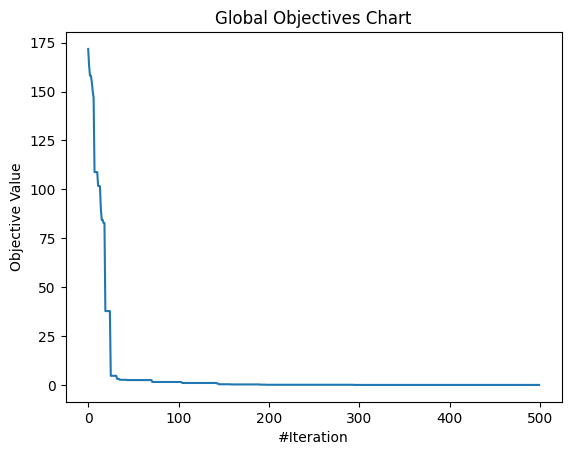

In [12]:
model.history.save_global_objectives_chart(filename="hello/goc")

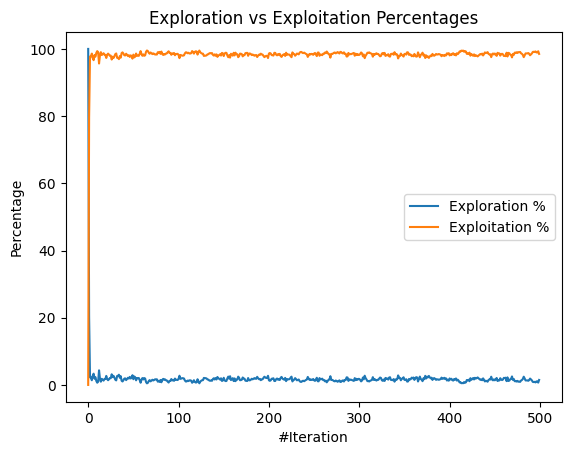

In [13]:
model.history.save_exploration_exploitation_chart(filename="hello/eec")

# Will not run (not working in Python notebook)

In [14]:
# ## Try to run this optimizer on this problem 5 times (n_trials = 5).
# ## Get the best model by mean value of all trials
# ## Distribute to 4 CPU to run (n_jobs=4)
# tuner.execute(problem=p1, termination=term, n_trials=5, n_jobs=4, verbose=True)

# print(tuner.best_row)
# print(tuner.best_score)
# print(tuner.best_params)
# print(type(tuner.best_params))

# print(tuner.best_algorithm)
# ## Better to save the tuning results to CSV for later usage
# tuner.export_results()
# tuner.export_figures()

#     ## Now we can even re-train the algorithm with the best parameter by calling resolve() function
# ## Resolve() function will call the solve() function in algorithm with default problem parameter is removed.
# ##    other parameters of solve() function is keeped and can be used.
# g_best = tuner.resolve(mode="thread", n_workers=4, termination=term)

# ## Print out the best score of the best parameter
# print(g_best.solution, g_best.target.fitness)

# print(tuner.algorithm.problem.get_name())

# ## Print out the algorithm with the best parameter
# print(tuner.best_algorithm.get_name())